<a href="https://colab.research.google.com/github/bioai96/Pytorch/blob/main/Pytorch_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이진 분류 모델 구축

### 1. 분류용 데이터 만들기

In [ ]:
from sklearn.datasets import make_circles

n_samples = 1000
X,y = make_circles(n_samples,
                   noise = 0.03, #값에 노이즈 추가 
                   random_state= 42) 

In [ ]:
print(X[:10])
print(y[:10])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]
 [-0.47964637  0.67643477]
 [-0.01364836  0.80334872]
 [ 0.77151327  0.14775959]
 [-0.16932234 -0.79345575]
 [-0.1214858   1.02150905]]
[1 1 1 1 0 1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y 
                        })
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

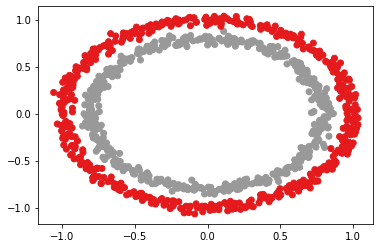

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.Set1)

### 2. 데이터 분할하기

In [ ]:
# 훈련,테스터 데이터 분할
from sklearn.model_selection import train_test_split

train_val, test = train_test_split(circles, test_size=0.1, random_state=42)
train, val = train_test_split(train_val, test_size =0.1/0.9, random_state=42)

datasets = {
    "train" : train,
    "val" : val,
    "test" : test
}
datasets

{'train':            X1        X2  label
 750  0.031913  0.785291      1
 960  0.954660 -0.332228      0
 759  1.004836 -0.058785      0
 881  0.955978 -0.137028      0
 106  0.612205  0.509429      1
 ..        ...       ...    ...
 165 -0.383562  0.698672      1
 169 -0.748444 -0.670130      0
 474 -0.404276 -0.891172      0
 434 -0.895065 -0.290665      0
 695 -1.008616 -0.124031      0
 
 [800 rows x 3 columns], 'val':            X1        X2  label
 361  0.430917  0.712274      1
 91   0.802265 -0.561765      0
 311  0.742811  0.265989      1
 253  0.184497 -0.745433      1
 72   0.355638  0.692264      1
 ..        ...       ...    ...
 870 -0.203952  0.752541      1
 254  0.217986 -0.951466      0
 935 -0.732711 -0.742139      0
 415 -0.703696  0.413043      1
 779 -0.774358 -0.012035      1
 
 [100 rows x 3 columns], 'test':            X1        X2  label
 521 -0.375193  0.682660      1
 737  0.015380  0.960026      0
 740 -0.702784 -0.314717      1
 660 -0.285250  0.966378    

In [ ]:
len(datasets["train"]),len(datasets["val"]),len(datasets["test"])

(800, 100, 100)

### 3. 커스텀 데이터세트 만들기

In [ ]:
from torch.utils.data import Dataset

class MyCircleDataset(Dataset):
  def __init__(self,df):
    self.x = list(df.iloc[:,0:2].values)
    self.y = list(df.iloc[:,2].values)

  def __len__(self):
    return len(self.x)
  
  def __getitem__(self, index):
    return torch.tensor(self.x[index]).float(), torch.tensor(self.y[index]).float()


circledata = {
      "train": MyCircleDataset(datasets["train"]),
      "val": MyCircleDataset(datasets["val"]),
      "test": MyCircleDataset(datasets["test"]),
}

In [ ]:
from torch.utils.data import DataLoader
import torch
dataloaders = {
    "train" : DataLoader(circledata["train"], batch_size=32, shuffle=True),
    "val" : DataLoader(circledata["val"], batch_size=32, shuffle=False),
    "test" : DataLoader(circledata["test"], batch_size=32, shuffle=False),
}

dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7f27aee27d10>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7f27aee27e10>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x7f27aee27ed0>}

In [ ]:
for data in dataloaders["train"]:
  x, y = data 
  print(x.shape, y.shape)

torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])
torch.Size([32, 2]) torch.Size([32])


### 4. 모델 만들기

In [ ]:
import torch
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.linear1 = nn.Linear(in_features=2, out_features=5)
    self.linear2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    out = self.linear1(x)
    out = self.linear2(out)
    return out

model = MLP()
model.to(device)

MLP(
  (linear1): Linear(in_features=2, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
)

### 5. 손실 및 최적화 함수 설정

In [ ]:
import torch.optim as optim

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss는 sigmoid를 내장하고 있음

optimizer = torch.optim.Adam(params=model.parameters(), lr=0.1)

#모델 평가를 위한 지표를 만들어 보자 
def acc_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() 두개의 텐서가 같은지 평가해줌
  acc = (correct/len(y_pred)) * 100
  return acc

### 6. 모델 학습하기 

In [ ]:
torch.manual_seed(42)

epochs=101

train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
  model.train()
  epoch_train_loss = 0.0
  
  for i, data in enumerate(dataloaders["train"]):
    x, y = data[0], data[1]
    optimizer.zero_grad()

    outputs = model(x)
    train_loss = loss_fn(outputs, y.view(-1,1))
    train_acc = acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
    train_loss.backward()
    optimizer.step()

    epoch_train_loss += train_loss.item() 
  
  model.eval()
  epoch_val_loss = 0.0
  with torch.inference_mode():
    for i, data in enumerate(dataloaders["test"]):
      x,y = data[0], data[1]

      outputs = model(x)
      val_loss = loss_fn(outputs, y.view(-1,1))
      val_acc = acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
      epoch_val_loss += val_loss.item()
  
  epoch_train_loss /= len(dataloaders["train"])
  epoch_val_loss /= len(dataloaders["test"])
  train_losses.append(epoch_train_loss)
  val_losses.append(epoch_val_loss)
  train_accs.append(train_acc)
  val_accs.append(val_acc)

  if epoch % 10 == 0:
    print("[Epoch %d] Train Loss: %.3f  Train acc : %.3f Validation Loss: %.3f Validation acc : %.3f" %
              (epoch, epoch_train_loss, train_acc, epoch_val_loss, val_acc))


[Epoch 0] Train Loss: 0.703  Train acc : 56.250 Validation Loss: 0.720 Validation acc : 25.000
[Epoch 10] Train Loss: 0.696  Train acc : 53.125 Validation Loss: 0.695 Validation acc : 25.000
[Epoch 20] Train Loss: 0.706  Train acc : 56.250 Validation Loss: 0.691 Validation acc : 75.000
[Epoch 30] Train Loss: 0.700  Train acc : 43.750 Validation Loss: 0.688 Validation acc : 75.000
[Epoch 40] Train Loss: 0.701  Train acc : 46.875 Validation Loss: 0.676 Validation acc : 75.000
[Epoch 50] Train Loss: 0.696  Train acc : 46.875 Validation Loss: 0.701 Validation acc : 25.000
[Epoch 60] Train Loss: 0.703  Train acc : 53.125 Validation Loss: 0.726 Validation acc : 25.000
[Epoch 70] Train Loss: 0.694  Train acc : 56.250 Validation Loss: 0.708 Validation acc : 25.000
[Epoch 80] Train Loss: 0.696  Train acc : 43.750 Validation Loss: 0.695 Validation acc : 25.000
[Epoch 90] Train Loss: 0.699  Train acc : 46.875 Validation Loss: 0.697 Validation acc : 50.000
[Epoch 100] Train Loss: 0.694  Train acc 

### 7. 결과 리포팅 하기 

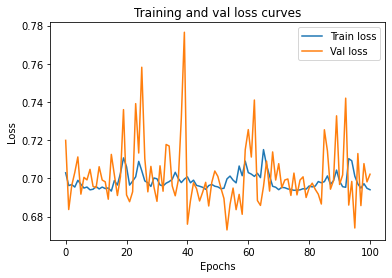

In [ ]:
# epoch = 100
epoch_count = range(epochs)
plt.plot(epoch_count, train_losses, label="Train loss")
plt.plot(epoch_count, val_losses, label = "Val loss")
plt.title("Training and val loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

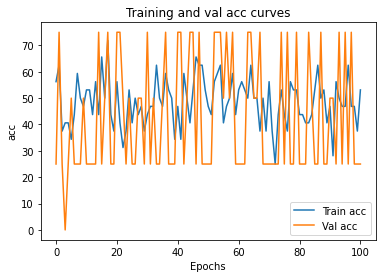

In [ ]:
#epoch:100
epoch_count = range(epochs)
plt.plot(epoch_count, train_accs, label="Train acc")
plt.plot(epoch_count, val_accs, label="Val acc")
plt.title("Training and val acc curves")
plt.ylabel("acc")
plt.xlabel("Epochs")
plt.legend();

### 8. 훈련된 모델로 예측값 생성하기

In [ ]:
train_X=torch.tensor(datasets["train"].iloc[:,0:2].values).float()
train_y=torch.tensor(datasets["train"].iloc[:,2].values).float()
test_X=torch.tensor(datasets["test"].iloc[:,0:2].values).float()
test_y=torch.tensor(datasets["test"].iloc[:,2].values).float()

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

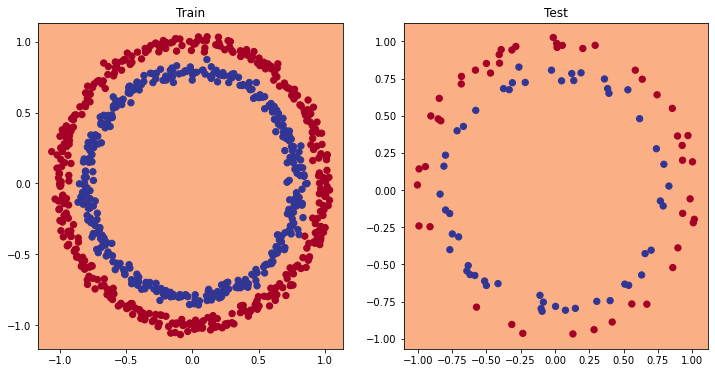

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, train_X, train_y)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, test_X, test_y)

## 모델개선하기

### 모델2

In [ ]:
class MLP2(nn.Module):
  def __init__(self):
    super(MLP2, self).__init__()
    self.linear1 =nn.Linear(in_features=2, out_features=10) # 히든 유닛 수 늘리기
    self.linear2 =nn.Linear(in_features=10, out_features=10)
    self.linear3 =nn.Linear(in_features=10, out_features=1) #레이어 추가
    self.relu = nn.ReLU() # 활성화 함수 사용

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out) 
    out = self.linear2(out)
    out = self.relu(out) 
    out = self.linear3(out)
    return out 

model2 = MLP2()



In [ ]:
import torch.optim as optim

loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss는 sigmoid를 내장하고 있음

optimizer = torch.optim.SGD(params=model2.parameters(), lr =0.01)

# 모델 평가를 위한 지표를 만들어 봅시다.
def acc_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() 두개의 텐서가 같은지 평가해줌
    acc = (correct / len(y_pred)) * 100 
    return acc

### 모델2 학습 

In [ ]:
torch.manual_seed(42)

epochs = 1000

train_losses = []
val_losses = []
train_accs = []
val_accs = [] 

for epoch in range(epochs):
    model2.train()
    epoch_train_loss = 0.0

    for i, data in enumerate(dataloaders["train"]):
        x,y = data[0],data[1]
        optimizer.zero_grad() #Pytorch에서는 gradients값들을 추후에 backward를 해줄때 계속 더해주기 때문에
                              #항상 backpropagation을 하기전에 gradients를 zero로 만들어주고 시작을 해야 

        outputs = model2(x)
        train_loss = loss_fn(outputs, y.view(-1,1))
        train_acc = acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
        train_loss.backward()
        optimizer.step()

        epoch_train_loss += train_loss.item()

    model2.eval()
    epoch_val_loss = 0.0
    with torch.inference_mode():
      for i, data in enumerate(dataloaders['test']):
          x,y = data[0], data[1]
          
          outputs = model2(x)
          val_loss = loss_fn(outputs, y.view(-1,1))
          val_acc = acc_fn(torch.round(torch.sigmoid(outputs)), y.view(-1,1))
          epoch_val_loss += val_loss.item()

    epoch_train_loss /= len(dataloaders["train"])
    epoch_val_loss /= len(dataloaders["test"])
    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc) 

    if epoch % 100 == 0 :
        print("[Epoch %d] Train Loss: %.3f Train acc : %.3f Validation Loss: %.3f Validation acc: %.3f" %
              (epoch, epoch_train_loss, train_acc, epoch_val_loss, val_acc))

[Epoch 0] Train Loss: 0.693 Train acc : 43.750 Validation Loss: 0.688 Validation acc: 75.000
[Epoch 100] Train Loss: 0.683 Train acc : 53.125 Validation Loss: 0.688 Validation acc: 50.000
[Epoch 200] Train Loss: 0.664 Train acc : 75.000 Validation Loss: 0.680 Validation acc: 50.000
[Epoch 300] Train Loss: 0.601 Train acc : 75.000 Validation Loss: 0.630 Validation acc: 75.000
[Epoch 400] Train Loss: 0.353 Train acc : 93.750 Validation Loss: 0.373 Validation acc: 100.000
[Epoch 500] Train Loss: 0.126 Train acc : 100.000 Validation Loss: 0.148 Validation acc: 100.000
[Epoch 600] Train Loss: 0.050 Train acc : 100.000 Validation Loss: 0.070 Validation acc: 100.000
[Epoch 700] Train Loss: 0.029 Train acc : 100.000 Validation Loss: 0.046 Validation acc: 100.000
[Epoch 800] Train Loss: 0.020 Train acc : 100.000 Validation Loss: 0.038 Validation acc: 100.000
[Epoch 900] Train Loss: 0.015 Train acc : 100.000 Validation Loss: 0.029 Validation acc: 100.000


### 테스트 데이터로 결과 확인하기

In [ ]:
train_X = torch.tensor(datasets["train"].iloc[:,0:2].values).float()
train_y = torch.tensor(datasets["train"].iloc[:,2].values).float()
test_X = torch.tensor(datasets["test"].iloc[:,0:2].values).float()
test_y = torch.tensor(datasets["test"].iloc[:,2].values).float()

In [ ]:
# 예측 생성
model2.eval()
with torch.inference_mode():
    y_preds = (torch.round(torch.sigmoid(model2(test_X).squeeze())))
y_preds[:10], test_y[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

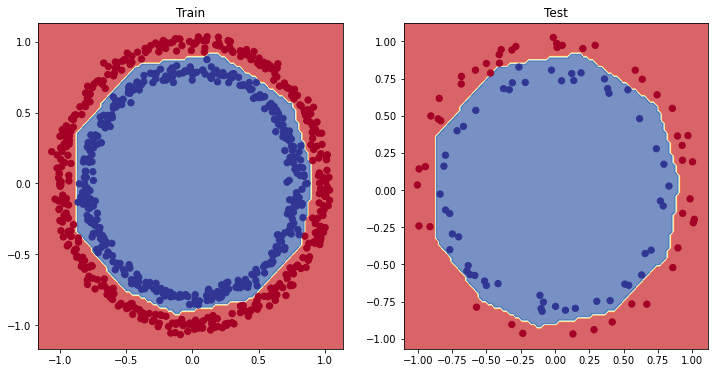

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model2,train_X,train_y)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model2,test_X,test_y)

## 다중 클래스 분류 모델 구축

### 1. 데이터 만들기

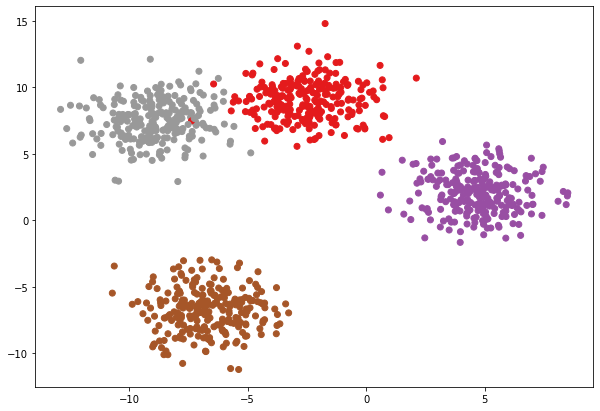

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2

X,y = make_blobs(n_samples=1000,
                 n_features=NUM_FEATURES,
                 centers = NUM_CLASSES,
                 cluster_std=1.5,
                 random_state=42
                 )
plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Set1)



### 2. 데이터 분할하기

In [ ]:
import pandas as pd
blob = pd.DataFrame({"X1":X[:,0],
                     "X2":X[:,1],
                     "label":y
})
blob.head(10)

,X1,X2,label
0,-8.413396,6.935165,3
1,-5.766484,-6.431171,2
2,-6.042137,-6.766102,2
3,3.950837,0.698403,1
4,4.250492,-0.281545,1
5,-6.794108,-6.477221,2
6,5.210176,2.889048,1
7,-5.505136,-6.360377,2
8,-6.543756,-4.833899,2
9,6.449642,0.747766,1


In [ ]:
from sklearn.model_selection import train_test_split

train_val,test = train_test_split(blob, test_size=0.1, random_state=42)
train, val = train_test_split(train_val, test_size = 0.1/0.9, random_state=42)

datasets = {
    "train" : train,
    "val" : val,
    "test" : test
}
datasets

{'train':             X1        X2  label
 750   5.890762  2.661940      1
 960   4.359571  1.313573      1
 759  -6.189669 -7.896683      2
 881  -8.957790  8.002081      3
 106   6.770635  1.117050      1
 ..         ...       ...    ...
 165  -4.296153  9.999117      0
 169  -5.079006 -7.865451      2
 474 -10.337281  6.566361      3
 434  -7.408623  7.754209      3
 695  -8.524040 -9.040186      2
 
 [800 rows x 3 columns], 'val':            X1        X2  label
 361 -4.664817 -4.809973      2
 91  -0.347288  6.860493      0
 311 -6.599295  6.916838      3
 253  4.832035  0.951592      1
 72   3.720696  1.391617      1
 ..        ...       ...    ...
 870 -8.866391  6.740745      3
 254  5.893417  0.278609      1
 935 -5.727204  5.944446      3
 415 -6.917958 -5.121016      2
 779 -7.152159  8.744813      3
 
 [100 rows x 3 columns], 'test':            X1         X2  label
 521  4.667506   4.487826      1
 737 -7.996949   6.880302      3
 740 -6.280095  -7.857145      2
 660  3.6832

### 3. 커스텀 데이터 세트 만들기

In [ ]:
len(datasets['train']),len(datasets['val']),len(datasets['test'])

(800, 100, 100)

In [ ]:
from torch.utils.data import Dataset
class MyblobDataset(Dataset):
  def __init__(self, df):
    self.x = list(df.iloc[:,0:2].values)
    self.y = list(df.iloc[:,2].values)

  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    return torch.tensor(self.x[index]).float(), torch.tensor(self.y[index]).long()

blobdata = {
    "train": MyblobDataset(datasets["train"]),
    "val": MyblobDataset(datasets["val"]),
    "test": MyblobDataset(datasets["test"])}

In [ ]:
blobdata['train'][0:11]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  # This is added back by InteractiveShellApp.init_path()


(tensor([[  5.8908,   2.6619],
         [  4.3596,   1.3136],
         [ -6.1897,  -7.8967],
         [ -8.9578,   8.0021],
         [  6.7706,   1.1171],
         [ -2.6723,   9.6169],
         [-10.6069,   9.1050],
         [ -7.0121,  -3.0105],
         [ -3.7667,  -7.9139],
         [ -4.6070,   9.8587],
         [ -7.1390,  -4.3125]]), tensor([1, 1, 2, 3, 1, 0, 3, 2, 2, 0, 2]))

In [ ]:
from torch.utils.data import DataLoader

blob_dataloaders = {
    "train": DataLoader(blobdata["train"], batch_size=32, shuffle=True),
    "val": DataLoader(blobdata["val"], batch_size=32, shuffle=False),
    "test": DataLoader(blobdata["test"], batch_size=32, shuffle=False)
}

In [ ]:
for data in blob_dataloaders["train"]:
  x,y = data
  print(x.shape, x.dtype, y.shape, y.dtype)

torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torch.int64
torch.Size([32, 2]) torch.float32 torch.Size([32]) torc

### 4. 모델만들기

In [ ]:
import torch
from torch import nn

# cpu나 gpu에서 모두 동작하게 만들기
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
class blob_MLP(nn.Module):
    def __init__(self):
        super(blob_MLP, self).__init__()
        self.linear1 = nn.Linear(in_features=NUM_FEATURES, out_features=10) # 히든 유닛 수 늘리기 
        self.linear2 = nn.Linear(in_features=10, out_features=10)
        self.linear3 = nn.Linear(in_features=10, out_features=NUM_CLASSES) # 클래스 수로 설정
        self.relu = nn.ReLU()
    
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.relu(out)
        out = self.linear3(out)
        return out
        
model3 = blob_MLP()

    



### 5. 손실 및 최적화 함수 설정

In [ ]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model3.parameters(), lr= 0.1)

#모델 평가를 위한 지표

def acc_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() #텐서에서 값만 가지고 옴
    acc = (correct / len(y_pred)) * 100
    return acc

### 6. 모델 학습하기

In [ ]:
torch.manual_seed(42)

# 전체 학습 데이터로 몇번 학습 시킬 것이냐를 결정
epochs = 200 #반복횟수 늘리기

# 손실 값을 저장하기 위한 변수 정의
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    model3.train()
    epoch_train_loss = 0.0

    for i, data in enumerate(blob_dataloaders["train"]):
        x, y = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = model3(x)
        train_loss = loss_fn(outputs, y)
        
        train_acc = acc_fn(torch.softmax(outputs, dim=1).argmax(dim=1), y)
        train_loss.backward()
        optimizer.step()
        
        epoch_train_loss += train_loss.item()
        
    model3.eval()
    epoch_val_loss = 0.0
    with torch.inference_mode():
        for i, data in enumerate(blob_dataloaders["test"]):
            x, y = data[0].to(device), data[1].to(device)
                        
            outputs = model3(x)
            val_loss = loss_fn(outputs, y)
            val_acc = acc_fn(torch.softmax(outputs, dim=1).argmax(dim=1), y)
            epoch_val_loss += val_loss.item()
            
    epoch_train_loss /= len(blob_dataloaders["train"])
    epoch_val_loss /= len(blob_dataloaders["test"])
    train_losses.append(epoch_train_loss)
    val_losses.append(epoch_val_loss)
    train_accs.append(train_acc)
    val_accs.append(val_acc)
    
    if epoch % 10 == 0:
        print("[Epoch %d] Train Loss: %.3f  Train acc : %.3f Validation Loss: %.3f Validation acc : %.3f" %
              (epoch, epoch_train_loss, train_acc, epoch_val_loss, val_acc))

[Epoch 0] Train Loss: 0.019  Train acc : 100.000 Validation Loss: 0.004 Validation acc : 100.000
[Epoch 10] Train Loss: 0.017  Train acc : 100.000 Validation Loss: 0.003 Validation acc : 100.000
[Epoch 20] Train Loss: 0.018  Train acc : 96.875 Validation Loss: 0.003 Validation acc : 100.000
[Epoch 30] Train Loss: 0.018  Train acc : 100.000 Validation Loss: 0.004 Validation acc : 100.000
[Epoch 40] Train Loss: 0.019  Train acc : 100.000 Validation Loss: 0.004 Validation acc : 100.000
[Epoch 50] Train Loss: 0.019  Train acc : 93.750 Validation Loss: 0.004 Validation acc : 100.000
[Epoch 60] Train Loss: 0.016  Train acc : 100.000 Validation Loss: 0.004 Validation acc : 100.000
[Epoch 70] Train Loss: 0.019  Train acc : 100.000 Validation Loss: 0.004 Validation acc : 100.000
[Epoch 80] Train Loss: 0.017  Train acc : 100.000 Validation Loss: 0.002 Validation acc : 100.000
[Epoch 90] Train Loss: 0.018  Train acc : 100.000 Validation Loss: 0.004 Validation acc : 100.000
[Epoch 100] Train Loss:

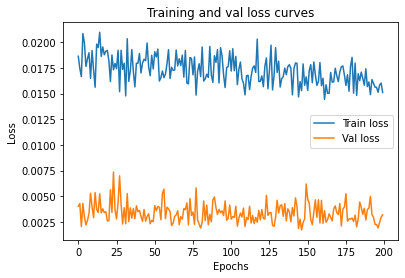

In [ ]:
epoch_count = range(epochs)
plt.plot(epoch_count, train_losses, label="Train loss")
plt.plot(epoch_count, val_losses, label="Val loss")
plt.title("Training and val loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

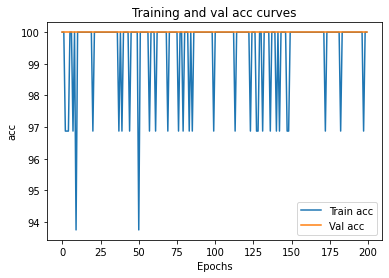

In [ ]:
epoch_count = range(epochs)
plt.plot(epoch_count, train_accs, label="Train acc")
plt.plot(epoch_count, val_accs, label="Val acc")
plt.title("Training and val acc curves")
plt.ylabel("acc")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
train_X=torch.tensor(datasets["train"].iloc[:,0:2].values).float()
train_y=torch.tensor(datasets["train"].iloc[:,2].values).long()
test_X=torch.tensor(datasets["test"].iloc[:,0:2].values).float()
test_y=torch.tensor(datasets["test"].iloc[:,2].values).long()

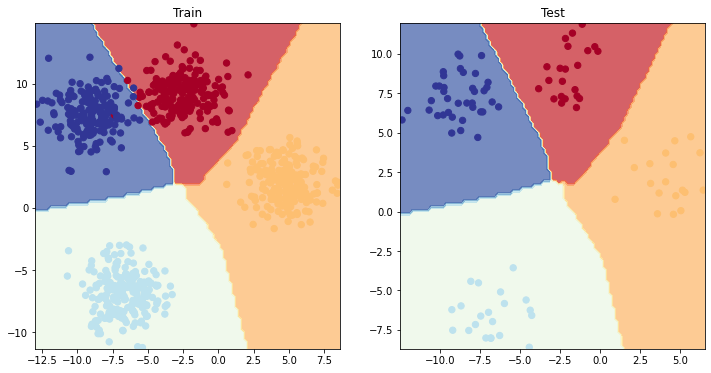

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model3, train_X, train_y)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model3, test_X, test_y)